<a href="https://colab.research.google.com/github/abhishhari/Code/blob/Research-Project/ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Modelling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE



In [ ]:
#  Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/Project/Dataset/ML/light_combined.csv")

In [ ]:
# Selecting the features
features  = [ 
    'num_bursts',
    'mean_duration',
    'std_duration',
    'mean_amplitude',
    'std_amplitude',
    'slope',
    'xmin',
    'L',
    'peak_autocorr_data1',
    'peak_autocorr_data2',
    'second_peak_autocorr_data1',
    'second_peak_autocorr_data2',
    ]
X = df.loc[:, features].values
y = np.ravel(df.loc[:,['label']].values)


Balancing the dataset

In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

Classification using Leave-one-out Cross validation

In [ ]:
from sklearn.model_selection import LeaveOneOut

from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
# Create a SVM classifier with a linear kernel
clf = svm.SVC(kernel='sigmoid', probability=True)

# Use leave-one-out cross-validation
cv = LeaveOneOut()

# Train and evaluate the classifier using leave-one-out cross-validation
y_true, y_pred, y_proba = [], [], []

for train_index, test_index in LeaveOneOut().split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = clf.fit(X_train, y_train)
    y_true.append(y_test[0])
    y_pred.append(model.predict(X_test)[0])
    y_proba.append(model.predict_proba(X_test)[0][1])

acc = accuracy_score(y_true, y_pred) * 100
auc = roc_auc_score(y_true, y_proba) * 100

result_table = pd.DataFrame(columns=['classifiers','score','auc'])
result_table = result_table.append({'classifiers': 'SVM',
                                    'score':acc,
                                    'cross val':'LeaveOneOut',
                                    'auc':round(auc,2),
                                    }, ignore_index=True)
result_table.set_index('classifiers', inplace=True)
result_table

In [ ]:
# Applying SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

Classification using 5 Fold Cross validation 

In [ ]:
# Spliting the  data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Creating a SVM classifier with a linear kernel
clf = svm.SVC(kernel='sigmoid', probability=True)

# Training the classifier on the training data
model = clf.fit(X_train, y_train)

# Making predictions on the testing data using 5 fold Cross Validation 
y_pred = clf.predict(X_test)

acc = model.score(X_test,y_test)*100
cross_val = round(cross_val_score(model, X, y, cv=5).mean()*100,2)
yproba = model.predict_proba(X_test)[::,1]


fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = pd.DataFrame(columns=['classifiers','score','auc'])
result_table = result_table.append({'classifiers': 'SVM',
                                    'score':acc,
                                    'cross val':cross_val,
                                    'auc':round(auc*100,2),
                                    }, ignore_index=True)
result_table.set_index('classifiers', inplace=True)
result_table

<ipython-input-11-c22af7d8233d>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': 'SVM',


,score,auc,cross val
classifiers,,,
SVM,75.0,75.0,77.86


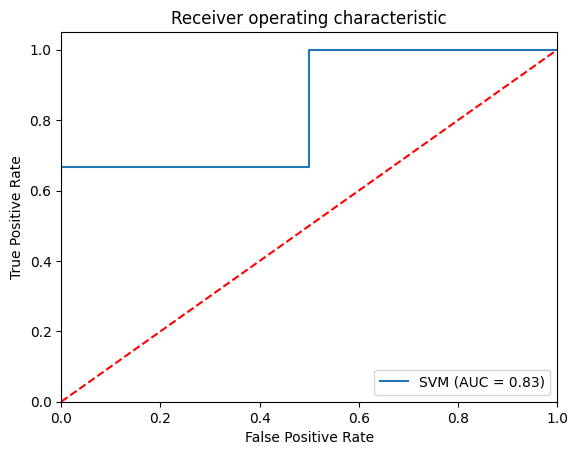

In [ ]:
import matplotlib.pyplot as plt

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='SVM (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<ipython-input-12-9213a8b41b1a>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': 'SVM',


,score,auc,cross val
classifiers,,,
SVM,77.777778,33.04,LeaveOneOut
